In [65]:
# auto-reload imports 
%load_ext autoreload
%autoreload 2
%time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
CPU times: user 30 µs, sys: 20 µs, total: 50 µs
Wall time: 74.9 µs


In [66]:

import mc.replay_analysis.functions.model_rdms as model_rdms
import mc.replay_analysis.functions.data_rdms as data_rdms
import mc.analyse.analyse_MRI_behav as analyse_MRI_behav
from mc.analyse.searchlight import get_volume_searchlight
import nibabel as nib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import Parallel, delayed
from tqdm import tqdm
sns.set_style('dark')
# from rsatoolbox.util.searchlight import get_volume_searchlight
from nilearn.image import load_img
import pickle



In [67]:

SUB = "sub-02"
SUBJECT_DIRECTORY = '/Users/student/PycharmProjects/data/derivatives/' + SUB + '/'
EVS_TYPE = 'instruction_period'
TASK_HALVES = ['1', '2']
RDM_VERSION = '01'

## Get the EVs Dictionary 
Make sure that out conditions are labeled
Remove the task halves. Just have a naming convention that keeps track of this. 

In [68]:

# Create dictionary to store the data for each EV for both task halves
# Convert the output of this to be pandas arrays

EVs_both_halves_dict = {
    '1': None,
    '2': None
}
# create new dictionary to store the 2D array of EVs for both task halves
EVs_both_halves_2d = EVs_both_halves_dict.copy()

    
EVs_path_dict = data_rdms.get_EV_path_dict(
    subject_directory = SUBJECT_DIRECTORY,
    EVs_type = EVS_TYPE
    )

# Load in the EVs for the instruction periods from the dictionary of paths
EVs_data_dict = data_rdms.load_EV_data(
    EVs_path_dict = EVs_path_dict,
    RDM_VERSION = RDM_VERSION
)

# Unravel the values of each EV
EVs_data_dict = data_rdms.unravel_EV_data(EVs_data_dict)
EVs_data_dict = pd.DataFrame(EVs_data_dict)


# get column names
column_names = EVs_data_dict.columns.tolist()
for idx, name in enumerate(column_names):
    column_names[idx] = name[3:7]
    

# column_names
EVs_data_dict.rename(columns=dict(zip(EVs_data_dict.columns.tolist(), column_names)), inplace=True)

conditions = data_rdms.get_standard_order()
# reorder the columns 
EVs_data_dict.loc[:, conditions]


# EVs_data_dict[]

,A1_f,A1_b,B1_f,B1_b,C1_f,C1_b,D1_f,D1_b,E1_f,E1_b,A2_f,A2_b,B2_f,B2_b,C2_f,C2_b,D2_f,D2_b,E2_f,E2_b
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
746492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
746493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
746494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Get the Searchlights
- Requires the mask file

In [69]:

# Load binary mask of the brain
mask = load_img(f"{SUBJECT_DIRECTORY}/anat/{SUB}_T1w_noCSF_brain_mask_bin_func_01.nii.gz")
print(mask.shape)
mask = mask.get_fdata()
print(mask.shape)




(108, 108, 64)
(108, 108, 64)


In [70]:

# Get list of voxel centers and their volume neighbours
centers, vol_neighbors = get_volume_searchlight(
    mask = mask,
    radius = 3,
    threshold = 0.5)


# Deals with searchlights that are not the correct size
vol_neighbors = data_rdms.resize_neighbors(
    vol_neighbors = vol_neighbors,
    size = 93
)
%timeit




















Data Searchlights Running:   0%|          | 0/1000 [20:13<?, ?it/s]



































































Finding searchlights...: 100%|██████████| 168204/168204 [00:10<00:00, 15530.75it/s]


Found 166240 searchlights


In [71]:
vol_searchlight = data_rdms.create_vol_searchlight_dataframe(
    vol_neighbors = vol_neighbors,
    centers = centers
)


data_searchlight = data_rdms.get_data_searchlight(
    vol_searchlight = vol_searchlight,
    EVs_data_dict = EVs_data_dict,
)

%timeit

Creating searchlights...: 166240it [11:44, 236.02it/s]                    


In [10]:

# # save data_searchlight to a pickle file
# with open(f"{SUBJECT_DIRECTORY}/searchlight_data_searchlight.pkl", 'wb') as f:
#     pickle.dump(data_searchlight, f)

# load data_searchlight from a pickle file
with open(f"{SUBJECT_DIRECTORY}/searchlight_data_searchlight.pkl", 'rb') as f:
    data_searchlight = pickle.load(f)


## Get the RDMs for each searchlight
- Data structure here, requires that the RDMs have condition labels (that will come from the EVs condition labels)

In [15]:
# get first 1000 entries o data_searchlight dictionary

data_searchlight = {k: data_searchlight[k] for k in list(data_searchlight)[:1000]}


In [54]:
# create test df of EVs for the conditons
# data_searchlight = dict(data_searchlight.items()[:100])

# create dictionary of data rdms
data_rdms_dict = data_rdms.get_data_rdms(
    data_searchlight = data_searchlight,
    SIZE = 'cross_corr'
    )

%timeit

































































Creating RDMS...: 100%|██████████| 1000/1000 [00:06<00:00, 152.52it/s]


In [55]:

data_rdms_dict[list(data_rdms_dict.keys())[0]]

,A2_f,A2_b,B2_f,B2_b,C2_f,C2_b,D2_f,D2_b,E2_f,E2_b
A1_f,1.377594,1.168077,1.144793,0.943009,1.471680,0.986912,1.407749,0.919031,0.736832,1.191028
A1_b,1.326315,1.585505,1.161017,1.438758,1.006534,1.298974,1.804180,1.127091,0.999326,1.121455
B1_f,1.596728,1.732913,1.623817,1.802016,0.785430,1.857890,2.306851,1.485330,1.527288,1.470182
B1_b,1.246183,1.714585,1.526451,1.138686,1.486471,1.657962,1.578298,1.176722,1.296131,1.342329
C1_f,1.246721,1.462041,1.332827,1.372914,1.026690,1.492531,2.285063,1.288450,1.099274,1.517748
C1_b,1.550378,1.550164,1.357763,1.312795,0.950775,1.641908,1.921102,1.265530,1.215632,1.343122
D1_f,1.155971,1.178511,1.250250,1.392050,1.158059,1.000920,1.899652,1.162158,1.049346,1.429867
D1_b,1.307624,0.726444,1.258449,1.061405,1.257960,1.135422,1.688158,0.964133,0.900673,1.193228
E1_f,1.057785,1.692491,1.282776,0.830592,1.935256,1.384377,1.111293,1.240839,1.246616,1.514827
E1_b,1.143022,1.504823,1.290019,1.050297,1.827826,1.347965,0.633261,1.142906,1.288775,1.160468


In [56]:
# save data_rdms_dict to a pickle file
with open(f"{SUBJECT_DIRECTORY}/searchlight_data_rdms.pkl", 'wb') as f:
    pickle.dump(data_rdms_dict, f)

# # load data_searchlight from a pickle file
# with open(f"{SUBJECT_DIRECTORY}/searchlight_data_searchlight.pkl", 'rb') as f:
#     data_searchlight = pickle.load(f)

%timeit

ValueError: The number of FixedLocator locations (20), usually from a call to set_ticks, does not match the number of labels (10).

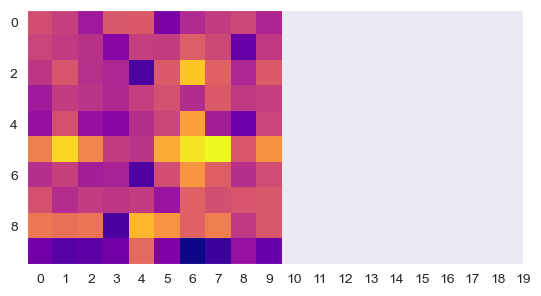

In [57]:
# Plot the searchlight RDMS
center = 161427

data_rdms.plot_rdm(
    df = data_rdms_dict,
    idx = center,
    SIZE = 'between_halves'
    )

In [58]:
# load data_rdms_dict from a pickle file
with open(f"{SUBJECT_DIRECTORY}/searchlight_data_rdms.pkl", 'rb') as f:
    data_rdms_dict = pickle.load(f)

data_rdms_dict[161427].shape

(10, 10)

In [61]:
# load data_rdms_dict from a pickle file
with open(f"{SUBJECT_DIRECTORY}/searchlight_data_rdms.pkl", 'rb') as f:
    data_rdms_dict = pickle.load(f)


# convert to triangle vectors for RSA
data_rdms_tri = data_rdms.get_data_rdms_tri(
    data_rdms_dict = data_rdms_dict
    )

# Get the conditions in the correct order
conditions = data_rdms.get_standard_order()

# RETURNING THE INCORRECT DICTIONARY. GETTING AN ERROR
model_rdms_dict = model_rdms.get_model_rdms(
    conditions = conditions, 
    TYPE = 'replay', 
    SIZE = 'cross_corr')


model_rdms_dict_tri = data_rdms.get_data_rdms_tri(
    data_rdms_dict = model_rdms_dict
    )




eval_result = Parallel(n_jobs=1)(delayed(data_rdms.evaluate_model)(
    Y = model_rdms_dict_tri['replay'],                                                      # Model that is being evaluated              
    X = data_rdms_tri[searchlight]
    ) for searchlight in tqdm(data_rdms_tri.columns, desc = "Data Searchlights Running"))   # (from the list of data RDMs)















Data Searchlights Running: 100%|██████████| 1000/1000 [00:01<00:00, 759.28it/s]
